In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%load_ext autoreload
%autoreload 2

In [8]:
import os
#from format_reader import read_sur
import numpy as np
import matplotlib.pyplot as plt
from pySurf.readers.read_sur_files import readsur

#from test_readers import testfolder
from pySurf.data2D import plot_data, read_data
from pySurf.data2D_class import Data2D
#from pySurf.readers.format_reader import points_reader,csvZygo_reader  #
#from pySurf.readers.format_reader import sur_reader
import os
import sys

2021-11-19 17:08:44,858 [17964] WARNING  py.warnings:181: [JupyterRequire] C:\Users\kovor\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
  return f(*args, **kwds)



In [5]:
#ported to/from notebook

def test_read_fits(file, raw = False):

    """read a sur file using read_sur_files, that is expected to return a structure
     res.points, .xAxis, .yAxis"""

    res = readsur(file,raw = raw) #in readsur the default is False.
    data,x,y = res.points,res.xAxis,res.yAxis
    del res.points
    del res.xAxis
    del res.yAxis
    header=res #stripped of all data information

    return (data,x,y),header

# Readers

`pySurf.readers` contains a set of "reader" functions to read common and generic data formats into surface data.

The most complete and highest level is in module `pySurf.readers.instrumentReader` whose functions aim to translate all the information containted in a data file to a `pySurf.data2D_class.Data2D` object updated from data and metadata.

If you need to read a known format, or a custom format based on an existing one, it is usually not necessary to go beyond this module. Other modules and functions allow a finer and lower-level control of data and their parameters.


//BANNER//  Warning of development state
N.B.: at the moment return `data, x, y`

//SKETCH OF MODULES STRUCTURE//

## Basic usage

In [9]:
testfolder = r'..\test'
testfile = r'input_data\\CCI\\01_PCO2S03_00009.sur'
file = os.path.join(testfolder,testfile)

In the simplest case a reader can be called directly with a file name to obtain a data2D object:

<.Data2D "" at 0x1a23fc42828>


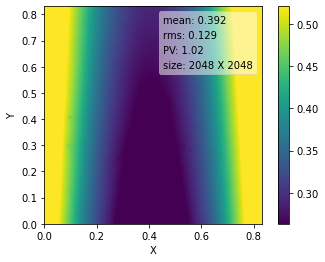

In [24]:
#replace with improved code with new interface!
from pySurf.readers.instrumentReader import matrixsur_reader
a = Data2D(*matrixsur_reader(file))  # a = matrixsur_reader(file)
print(a)
a.plot()

But it can be also passed at Data2D initialization.

In [25]:
a=Data2D(file,reader=matrixsur_reader)
a

first argument is string, use it as filename


<.Data2D "01_PCO2S03_00009.sur" at 0x1a23fc04d68>

This is just syntactic sugar, any optional parameter can be passed to the reader in both call.
In many cases, it is not even necessary to use the ```reader``` parameter, as the Data2D initialization function try to guess the type of file from the extension (in case this is not found, it falls back on a generic text reader):

In [94]:
a=Data2D(file)
a

first argument is string, use it as filename


<.Data2D "01_PCO2S03_00009.sur" at 0x2725ef45dd8>

The available formats and readers function names are listed in table:
#list of available formats

Unambiguous extensions are read automatically, otherwise a generic text reader is tried.

#lista di parametri automatici

Note that some formats might require additional parameters (for example to select a subframe, or specify a scale).

## Parameters

Each reader for a specific data format may requires its own parameters (for example to select a subframe, or quantities defined with different name or different equivalent formulation).

A set of standard registration parameters allows to adjust scales, offsets and tuning parameters. This is done by wrapping the reader function in `readers.instrumentReader`

and are then altered by calling `data2D.register_data`.
This mechanism is implemented in a function `data2D.read_data`.


## Building custom readers

The simplest way to create a new reader is modifying an existing one adding new defaults for existing parameters. Note these defaults can be easily overriden at the moment of using the reader.

N.B.: this is just a thin wrapper around the reader function, built using the ```functools.partial``` function:

    my_reader = make_reader(matrixsur_reader, center = [0,0], scale =[2,2,2]) # modify defaults

is just calling:

    from functools import partial
    my_reader = partial(matrixsur_reader, center = [0,0], scale =[2,2,2]) 

first argument is string, use it as filename
first argument is string, use it as filename
first argument is string, use it as filename


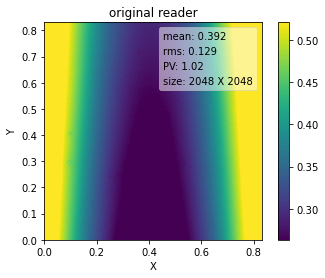

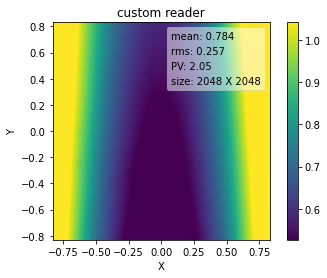

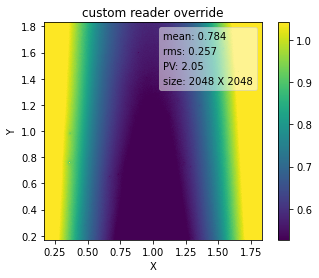

In [20]:
a = Data2D(file, reader = matrixsur_reader)
a.plot(title='original reader')

from functools import partial
my_reader = partial(matrixsur_reader, center = [0,0], scale =[2,2,2]) # modify defaults

plt.figure()
b = Data2D(file, reader = my_reader)
b.plot(title='custom reader')

plt.figure()
c = Data2D(file, reader = my_reader,center=[1,1])
c.plot(title='custom reader override')

### Implementation of a new format (```pySurf.readers.format_readers```)

2021-11-15 19:28:01,140 [29088] WARNING  py.warnings:181: [JupyterRequire] c:\users\kovor\documents\python\pyxtel\pyxsurf\pySurf\readers\read_sur_files.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype is np.str:



Running in path: C:\Users\kovor\Documents\python\pyXTel\pyxsurf\pySurf\readers
File path: C:\Users\kovor\Anaconda3\lib\site-packages\ipykernel_launcher.py
reading data 05_xysurf_pp_Intensity.sur


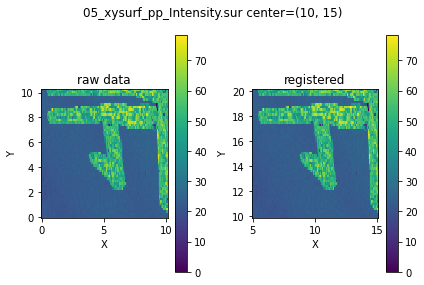

reading data 05_xysurf_pp_Intensity.txt


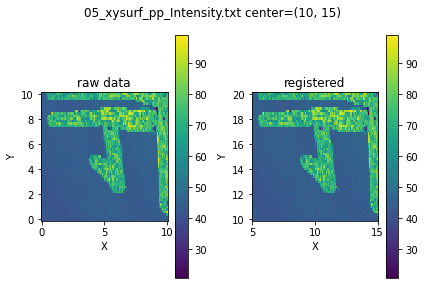

reading data 171212_PCO2_Zygo_data.asc


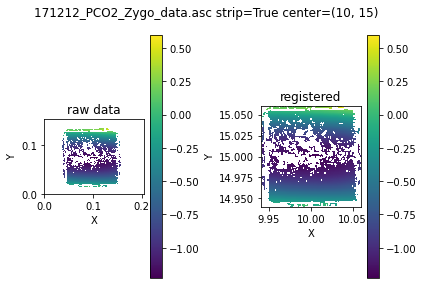

reading data 171212_PCO2_Zygo_data.asc


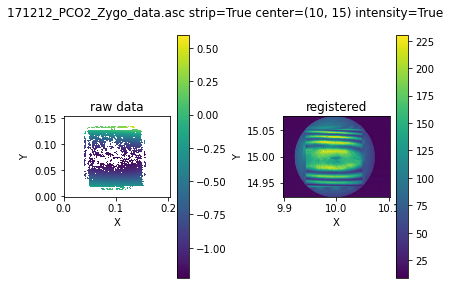

In [46]:
#if __name__=='__main__':

# da _instrument_reader: li' va rimossa la registrazione.

"""It is based on a tentative generic function read_data accepting among arguments a specific reader.
    The function first calls the data reader, then applies the register_data function to address changes of scale etc.
    This works well, however read_data must filter the keywords for the reader and for the register and
    this is hard coded, that is neither too elegant or maintainable. Note however that with this structure it is
    possible to call the read_data procedure with specific parameters, for example in example below, the reader for
    Zygo cannot be called directly with intensity keyword set to True without making a specific case from the other readers,
    while this can be done using read_data. """

from pySurf.readers.test_readers import test_readers

pwd = '.' #os.path.dirname(os.path.realpath(sys.argv[0]))

tests=[[sur_reader,
os.path.join(pwd,testfolder,r'input_data\profilometer\04_test_directions\05_xysurf_pp_Intensity.sur')
,{'center':(10,15)}],[points_reader,
os.path.join(pwd,testfolder,r'input_data\profilometer\04_test_directions\05_xysurf_pp_Intensity.txt')
# questo fallisce, perche' delimiter e' " "  e non e' possibile passare l'argomento al reader
#os.path.join(testfolder,r'input_data\exemplar_data\scratch\110x110_50x250_100Hz_xyscan_Height_transformed_4in_deltaR.dat')
,{'center':(10,15)}],
[csvZygo_reader,
os.path.join(pwd,testfolder,r'input_data\zygo_data\171212_PCO2_Zygo_data.asc')
,{'strip':True,'center':(10,15)}],
[csvZygo_reader,
os.path.join(pwd,testfolder,r'input_data\zygo_data\171212_PCO2_Zygo_data.asc')
,{'strip':True,'center':(10,15),'intensity':True}]]


test_readers(tests)


In [ ]:
testfolder = r'..\test'
#testfolder=r'G:\My Drive\libraries\python\userKov3\pySurf\test' #for economy during development, hard coded path.
#testfolder os.path.dirname(__file__) #to set it as relative to this file path.

In [18]:
from pySurf.readers import test_readers 

In [19]:
test_readers.test_readers


<function pySurf.readers.test_readers.test_readers(tests)>

In [20]:
test_readers.files

['..\\test\\input_data\\profilometer\\04_test_directions\\05_xysurf_pp_Height.sur',
 '..\\test\\input_data\\profilometer\\04_test_directions\\05_xysurf_pp_Height.txt',
 '..\\test\\input_data\\4D\\180215_C1S01_RefSub.csv',
 '..\\test\\input_data\\4D\\180215_C1S01_RefSub.h5',
 '..\\test\\input_data\\CCI\\01_PCO2S03_00009.sur',
 '..\\test\\input_data\\exemplar_data\\scratch\\110x110_50x250_100Hz_xyscan_Height_transformed_4in_deltaR_matrix.dat',
 '..\\test\\input_data\\exemplar_data\\scratch\\110x110_50x250_100Hz_xyscan_Height_transformed_4in_deltaR_matrix.fits',
 '..\\test\\input_data\\exemplar_data\\scratch\\110x110_50x250_100Hz_xyscan_Height_transformed_4in_deltaR.dat',
 '..\\test\\input_data\\fits\\reproducibility\\181016_01_PCO2S06_1009_08.fits',
 '..\\test\\input_data\\fits\\reproducibility\\181016_01_PCO2S06_1009_08.fits',
 '..\\test\\input_data\\newview\\105_C1S01.asc',
 '..\\test\\input_data\\newview\\105_C1S01.dat',
 '..\\test\\input_data\\newview\\105_C1S01.xyz',
 '..\\test\\inp

In [21]:
pwd


'C:\\Users\\kovor\\Documents\\python\\pyXTel\\pyxsurf\\pySurf\\readers'

## ..\test\input_data\profilometer\04_test_directions\05_xysurf_pp_Height.sur
first argument is string, use it as filename
## ..\test\input_data\profilometer\04_test_directions\05_xysurf_pp_Height.txt
first argument is string, use it as filename
fileformat ``.txt``not recognized for file ..\test\input_data\profilometer\04_test_directions\05_xysurf_pp_Height.txt
Use generic text reader


IndexError: tuple index out of range

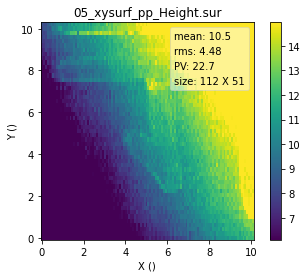

In [45]:
from pySurf.data2D_class import Data2D
from pySurf.points import get_points

a={f[1]:{'delimiter':',','reader':get_points}}
for f in test_readers.files:
    print('##',f)
    Data2D(f).plot(**(a.get(f,{})))

In [70]:
# test sovrascritture

fn = test_readers.files[4]
fn

'..\\test\\input_data\\CCI\\01_PCO2S03_00009.sur'

first argument is string, use it as filename


2021-11-18 01:26:37,040 [9036] WARNING  py.warnings:181: [JupyterRequire] C:\Users\kovor\Anaconda3\lib\inspect.py:2892: ResourceWarning: unclosed file <_io.FileIO name='..\\test\\..\\test\\input_data\\profilometer\\04_test_directions\\05_xysurf_pp_Height.txt' mode='rb' closefd=True>
  arg_val = next(arg_vals)



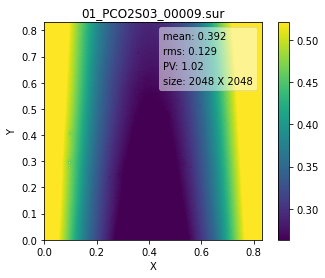

2021-11-18 01:26:37,980 [9036] WARNING  py.warnings:181: [JupyterRequire] C:\Users\kovor\Anaconda3\lib\site-packages\matplotlib\_pylab_helpers.py:88: ResourceWarning: unclosed file <_io.BufferedReader name='..\\test\\..\\test\\input_data\\profilometer\\04_test_directions\\05_xysurf_pp_Height.txt'>
  gc.collect(1)



In [71]:
d = Data2D(fn)
d.plot()

In [60]:
from pySurf.data2D_class import Data2D
from pySurf.readers.instrumentReader import matrixsur_reader

a= matrixsur_reader(fn)
a.plot()

AttributeError: 'tuple' object has no attribute 'plot'

array([[0.0000000e+00],
       [4.0592224e-04],
       [8.1184448e-04],
       ...,
       [8.3011097e-01],
       [8.3051693e-01],
       [8.3092284e-01]], dtype=float32)